In [195]:
import pandas as pd
import numpy as np
import seaborn as sns

In [300]:
df=pd.read_csv('Datahacktrain.csv')

In [284]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [199]:
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001228,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


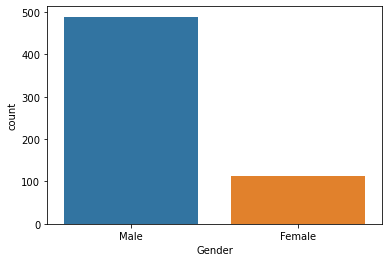

In [200]:
sns.countplot(df['Gender'])

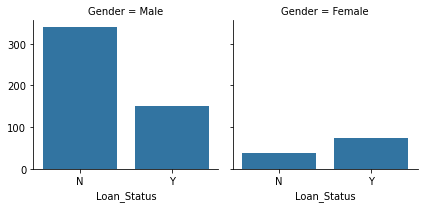

In [212]:
ax=sns.FacetGrid(df,col='Gender')
ax.map(sns.countplot,'Loan_Status')

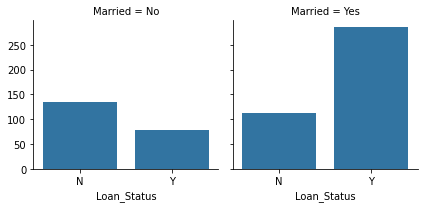

In [213]:
ax=sns.FacetGrid(df,col='Married')
ax.map(sns.countplot,'Loan_Status')

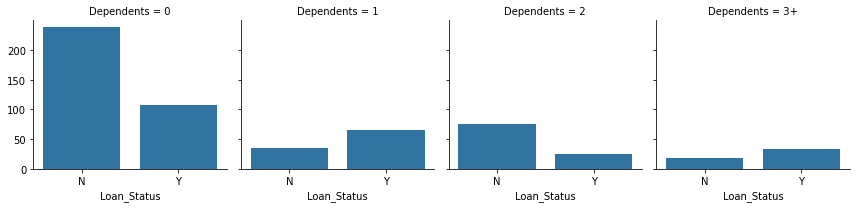

In [214]:
ax=sns.FacetGrid(df,col='Dependents')
ax.map(sns.countplot,'Loan_Status')

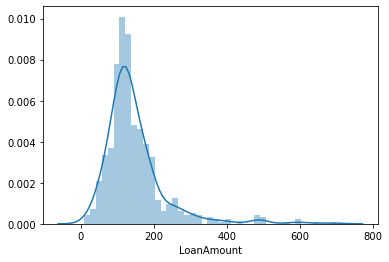

In [218]:
sns.distplot(df['LoanAmount']) 

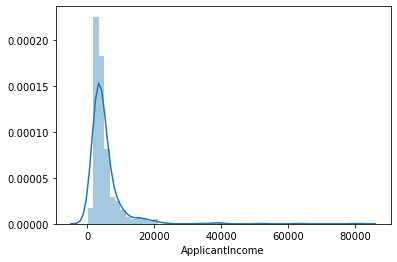

In [219]:
sns.distplot(df['ApplicantIncome'])

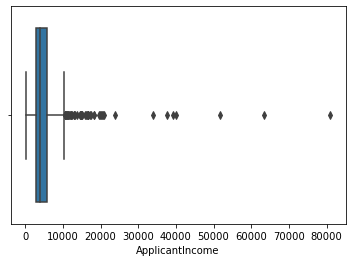

In [220]:
sns.boxplot(df['ApplicantIncome'])

In [286]:
#df['ApplicantIncome']=np.log(df['ApplicantIncome']+1)

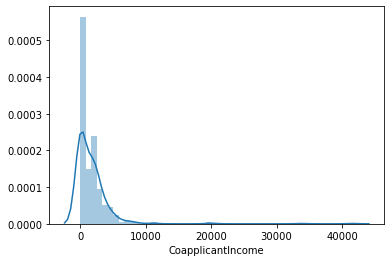

In [222]:
sns.distplot(df['CoapplicantIncome'])

In [288]:
#df['CoapplicantIncome']=np.log(df['CoapplicantIncome']+1)

In [225]:
df['Loan_Amount_Term'].value_counts(normalize=True)

360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
84.0     0.006667
240.0    0.006667
120.0    0.005000
36.0     0.003333
60.0     0.003333
12.0     0.001667
Name: Loan_Amount_Term, dtype: float64

In [226]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [227]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

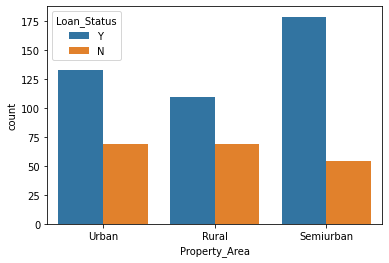

In [229]:
sns.countplot(df['Property_Area'],hue=df['Loan_Status'])

In [301]:
X_train=pd.get_dummies(df.drop(['Loan_ID','Loan_Status'],axis=1))

In [302]:
X_train.isnull().sum()

ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Gender_Female               0
Gender_Male                 0
Married_No                  0
Married_Yes                 0
Dependents_0                0
Dependents_1                0
Dependents_2                0
Dependents_3+               0
Education_Graduate          0
Education_Not Graduate      0
Self_Employed_No            0
Self_Employed_Yes           0
Property_Area_Rural         0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64

In [303]:
X_train['LoanAmount'].fillna(np.mean(X_train['LoanAmount']),inplace=True)

In [304]:
X_train['Loan_Amount_Term'].fillna(0,inplace=True)

In [305]:
X_train['Credit_History'].fillna(X_train['Credit_History'].mode()[0],inplace=True)

In [306]:
X_train['ApplicantIncome']=np.log(X_train['ApplicantIncome']+1)

In [307]:
X_train['CoapplicantIncome']=np.log(X_train['CoapplicantIncome']+1)

In [236]:
from sklearn.linear_model import LogisticRegression

In [322]:
ll=LogisticRegression()
ll.fit(X_train,df['Loan_Status'])

In [271]:
test=pd.read_csv('test_lAUu6dG.csv')

In [272]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [273]:
test['ApplicantIncome']=np.log(test['ApplicantIncome']+1)
test['CoapplicantIncome']=np.log(test['CoapplicantIncome']+1)

In [274]:
X_test=pd.get_dummies(test.drop(['Loan_ID'],axis=1))

In [275]:
X_test.tail()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
362,8.296547,7.483244,113.0,360.0,1.0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
363,8.333030,6.565265,115.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
364,8.086718,7.597898,126.0,360.0,NaN,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
365,8.517393,7.780721,158.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0
366,9.127067,0.000000,98.0,180.0,1.0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0


In [282]:
X_test.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [277]:
X_test['LoanAmount'].fillna(0,inplace=True)
X_test['Loan_Amount_Term'].fillna(0,inplace=True)
X_test['Credit_History'].fillna(1,inplace=True)

In [248]:
pred=ll.predict(X_test)

In [249]:
a=pd.DataFrame(test['Loan_ID'],columns=['Loan_ID'])

In [250]:
b=pd.DataFrame(pred,columns=['Loan_Status'])

In [251]:
pd.concat([a,b],axis=1).to_csv('hack.csv',index=False)

In [252]:
import lightgbm as lgb

In [321]:
model=lgb.LGBMClassifier()
model.fit(X_train,df['Loan_Status'])

In [309]:
pred=model.predict(X_test)

In [310]:
b=pd.DataFrame(pred,columns=['Loan_Status'])

In [311]:
pd.concat([a,b],axis=1).to_csv('hack.csv',index=False)

In [334]:
from sklearn.ensemble import VotingClassifier

In [340]:
finmodel=VotingClassifier(estimators=[('lr', model), ('rf', ll)], voting='hard',weights=(2,1))

In [341]:
finmodel.fit(X_train,df['Loan_Status'])

c:\users\swapn\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LGBMClassifier()),
                             ('rf', LogisticRegression())],
                 weights=(2, 1))

In [342]:
pred=finmodel.predict(X_test)

In [343]:
b=pd.DataFrame(pred,columns=['Loan_Status'])

In [344]:
pd.concat([a,b],axis=1).to_csv('hack.csv',index=False)